# **STAT-201 Project Report**

## Comparison of the rate of `Offences Against a Person` before and during the outbreak of COVID-19 in Vancouver, Canada
Zicheng Zhao, Shariq Imran Hassan, Yandong Huang, Wenhan Zhang

## Introduction
This report aims to investigate whether the outbreak of COVID-19 has affected the crime rate, particularly with regard to assault and other offenses. We will analyze the crime data from two different timeslots, before and after the outbreak of COVID-19, and use statistical methods to identify any significant differences in the frequency of crime. By understanding the impact of COVID-19 on crime, law enforcement, and policymakers can develop effective strategies to keep communities safe.

### Research Question
In this project, the main question which we want to figure out is:
#### *`Have` *`Offences Against a Person `* ` been influenced by the outbreak of COVID-19?`*

### Dataset
Our dataset contains crime information in Vancouver (all regions covered according to `VPD Open Data`) from 2017-2022, and including information such as:
- `TYPE`: The type of crime activities.
- `YEAR`, `MONTH`, `DAY`, `HOUR`, `MINUTE`: The time when the reported crime activity occured. (Based on the finding of the police investigation.)
- `HUNDRED_BLOCK`: Generalized location of the reported crime activity.
- `NEIGHBOURHOOD`: The name of the neighbourhood where the location of the reported crime activity was belonged to.
- `X`, `Y`: Coordinate Values. 

### Analysis
We aim to analyze `Offence Against a Person` data from subsetting `TYPE` of crime and to use it's timelime and count and location to understand its fluctutations before and after COVID. We will use `YEAR` to understand the timeline and `NEIGHBOURHOODS` to understand the impact in specific areas of Vancouver. 

We predict there to be significant fluctuation in `Offence Against a Person`.


For more information, please take a look at the website: https://vpd.ca/

### 1. Loading the dataset

First, we need to load the necessary libraries:

In [234]:
# Loading libraries
library(tidyverse)
library(GGally)
library(tidymodels)
library(broom)
library(repr)
library(infer)
library(ggplot2)
library(tidyr)

We first downloaded the dataset to our repository and read it from there as we cannot read datasets' directly from vpd's website.

Then the next thing we do is to take a glance at the dataset to see what it looks like.

In [235]:
crime <- read.csv("crime_data/merged_csv_files.csv")
head(crime)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Theft from Vehicle,2017,8,29,21,30,19XX TURNER ST,Grandview-Woodland,495232.4238,5458486.6121
2,Theft from Vehicle,2017,12,25,21,0,19XX UPLAND DR,Victoria-Fraserview,495089.4532,5451695.1098
3,Theft from Vehicle,2017,3,24,22,30,19XX VENABLES ST,Grandview-Woodland,495231.0367,5458207.3987
4,Theft from Vehicle,2017,10,23,9,22,19XX VENABLES ST,Grandview-Woodland,495231.0367,5458207.3987
5,Theft from Vehicle,2017,7,3,21,0,19XX W 11TH AVE,Kitsilano,489210.9151,5456573.0018
6,Theft from Vehicle,2017,11,10,16,0,19XX W 11TH AVE,Kitsilano,489210.9151,5456573.0018


**Table 1:** Preview of the crime data dataset to be analyzed.

### 2. Cleaning and Wrangling Data

We first need to clean the data and get rid of any NA values our datset might have. Therefore, now we filter out any NA data in the specific columns we feel we might need to analyze in our model. The `YEAR` column had an unusual string type which needed to be adressed and changed as well. 

Since we are also only focusing on the years from 2017 to 2022 (COVID Timeline), we subset the `YEAR` column.

In [236]:
# Filtering dataset, Setting Year Values to COVID Timeline
crime <- crime %>%
        filter(!is.na(NEIGHBOURHOOD)) %>%
        filter(!(YEAR == "YEAR")) %>%
        filter(!is.na(YEAR)) %>%
        filter(!is.na(MONTH)) %>%
        filter(!is.na(TYPE)) %>%
        subset(YEAR >= 2017 & YEAR <= 2022)

head(crime)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Theft from Vehicle,2017,8,29,21,30,19XX TURNER ST,Grandview-Woodland,495232.4238,5458486.6121
2,Theft from Vehicle,2017,12,25,21,0,19XX UPLAND DR,Victoria-Fraserview,495089.4532,5451695.1098
3,Theft from Vehicle,2017,3,24,22,30,19XX VENABLES ST,Grandview-Woodland,495231.0367,5458207.3987
4,Theft from Vehicle,2017,10,23,9,22,19XX VENABLES ST,Grandview-Woodland,495231.0367,5458207.3987
5,Theft from Vehicle,2017,7,3,21,0,19XX W 11TH AVE,Kitsilano,489210.9151,5456573.0018
6,Theft from Vehicle,2017,11,10,16,0,19XX W 11TH AVE,Kitsilano,489210.9151,5456573.0018


**Table 2:** Preview of the cleaned and filtered crime data dataset.

Now we would like to see the different `TYPE`'s of crime we have and its number of occurences from 2017 to 2022.

In [237]:
# Filter for TYPE of data and number of occurences
crime_type <- crime %>%
    group_by(TYPE) %>%
    summarize(n = n())

crime_type

TYPE,n
<chr>,<int>
Break and Enter Commercial,13553
Break and Enter Residential/Other,11953
Homicide,93
Mischief,34042
Offence Against a Person,21087
Other Theft,63346
Theft from Vehicle,70143
Theft of Bicycle,11554
Theft of Vehicle,6623


**Table 3:** Preview of `TYPE` and number of occurences of each crime (2017-2022)

Here we can see that we have 11 different categories for crime with the most occurences being 'Theft from Vehicle (70143)', and the least being 'Vehicle Collision or Pedestrian Struck (with Fatality) (87)'. Because we are also only focusing on `Offence Against a Person` from the `TYPE` data, we will filter `TYPE` data.

In [238]:
# Filtering `Type`
crime <- crime %>%
        filter((TYPE == "Offence Against a Person"))

head(crime)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Offence Against a Person,2017,7,1,0,0,OFFSET TO PROTECT PRIVACY,West End,0.0,0.0
2,Offence Against a Person,2017,2,14,0,0,OFFSET TO PROTECT PRIVACY,West End,0.0,0.0
3,Offence Against a Person,2017,5,28,0,0,OFFSET TO PROTECT PRIVACY,West End,0.0,0.0
4,Offence Against a Person,2017,9,22,0,0,OFFSET TO PROTECT PRIVACY,West End,0.0,0.0
5,Offence Against a Person,2017,7,1,0,0,OFFSET TO PROTECT PRIVACY,West End,0.0,0.0
6,Offence Against a Person,2017,10,31,0,0,OFFSET TO PROTECT PRIVACY,West End,0.0,0.0


**Table 4:** Preview of `Offence Against a Person` crime `TYPE`

### 3. Plots

Now we can do a simple plot of `Offence Against a Person` crime rate from 2017-2022 to see its general tendency.

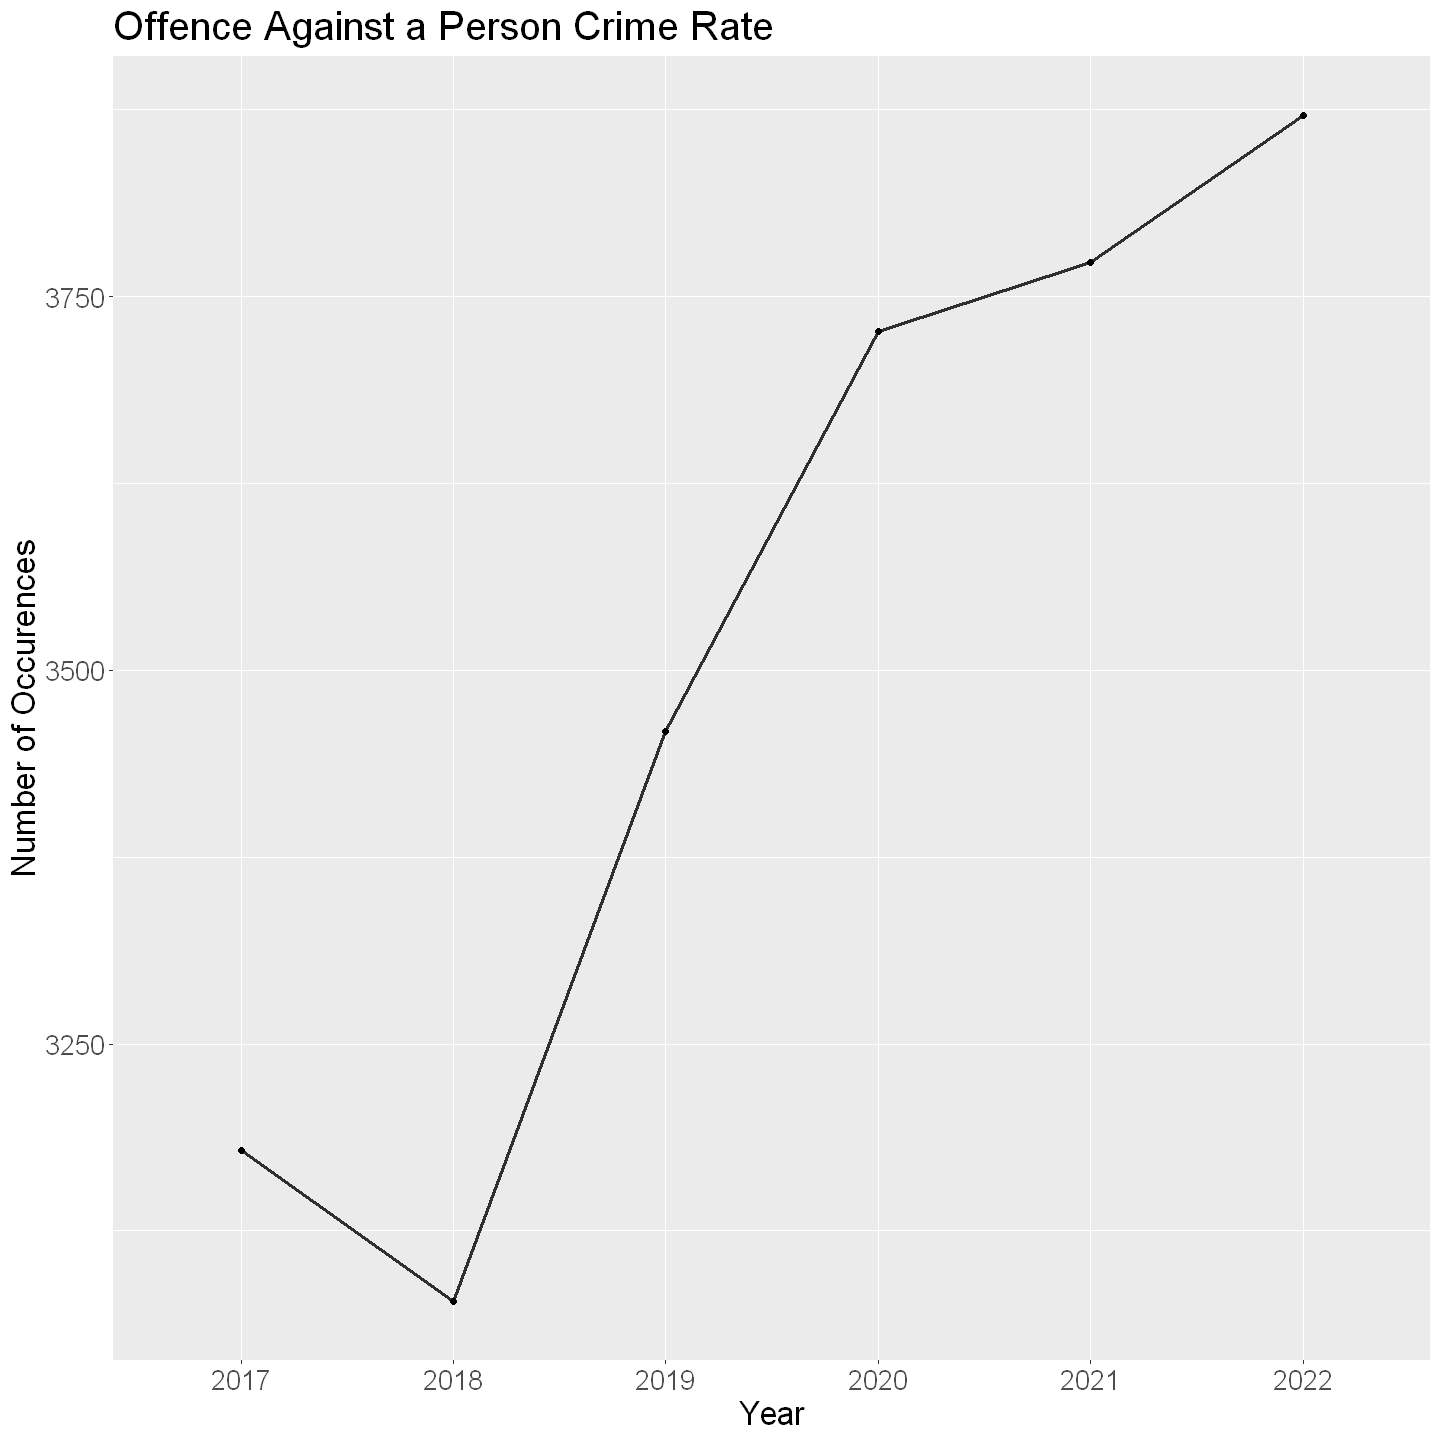

In [239]:
# Group Data by YEAR
annual_offence_crime <- crime %>%
               group_by(YEAR) %>%
               summarise(CRIME = n())

# Plot Annual Crime Data vs. Year
annual_offence_crime_plot <- annual_offence_crime %>%
               ggplot(aes(x = YEAR, y = CRIME, group = 1)) +
               geom_line(size = 1, alpha = 0.8) +
               geom_point() +
               ggtitle("Offence Against a Person Crime Rate") +
               labs(x = "Year", y = "Number of Occurences") +
               theme(text = element_text(size = 20))

options(repr.plot.width = 12, repr.plot.height = 12)

annual_offence_crime_plot

**Figure 1:** Line Graph for Number of of Offences Against a Person per Year.

From the visualized plot above, we can observe that since the outbreak of COVID-19 occurred in 2019, the crime ratio had a precipitous increase. We assume that the pandemic increased social disputes and offences potentially because of lay offs and isolation which may have impacted many mentally and financially.

According to the background of the pandemic, we would do analysis at specific locations using the `NEIGHBOURHOOD` column. Therefore, we would first filter out the columns not required, to simplify the chart.

In [240]:
# Selecting Columns
crime <- crime %>%
     select(TYPE, YEAR, MONTH, DAY, NEIGHBOURHOOD)

head(crime)

,TYPE,YEAR,MONTH,DAY,NEIGHBOURHOOD
,<chr>,<chr>,<chr>,<chr>,<chr>
1,Offence Against a Person,2017,7,1,West End
2,Offence Against a Person,2017,2,14,West End
3,Offence Against a Person,2017,5,28,West End
4,Offence Against a Person,2017,9,22,West End
5,Offence Against a Person,2017,7,1,West End
6,Offence Against a Person,2017,10,31,West End


**Table 5:** Dataframe with the required columns.

Now we have a a clean dataset ready for more analysis!

### 4. Comparing Crime Rates at different `NEIGHBOURHOODS`'s before and during COVID

Next, we would visualize this comparison as a plot by grouping by `NEIGHBOURHOOD` and `YEAR` and observing where this type of crime happened more frequently.

For the column `YEAR`, because we treat the outbreak of COVID-19 as the time point, we would combine the data of 2017-2019, and 2020-2022 together respectively.

In [241]:
# Refactor `YEAR` column into `COVID_OUTBREAK` column
out_break <- crime %>%
    mutate(COVID_OUTBREAK = case_when(
        YEAR <= 2019 ~ "Before_COVID",
        YEAR >= 2020 ~ "During_COVID"
    ))

# Group by `NEIGHBOURHOOD` and `COVID_OUTBREAK` for analysis
criming <- out_break %>%
    group_by(NEIGHBOURHOOD, COVID_OUTBREAK) %>%
    count() %>%
    spread(key = NEIGHBOURHOOD, value = n, fill = 0)

transposed_crime <- t(criming)

transposed_crime

COVID_OUTBREAK,Before_COVID,During_COVID
V1,6,7
Arbutus Ridge,34,51
Central Business District,3297,3902
Dunbar-Southlands,50,66
Fairview,223,292
Grandview-Woodland,592,659
Hastings-Sunrise,264,297
Kensington-Cedar Cottage,369,413
Kerrisdale,47,52
Killarney,152,166


**Table 6:** Before and During COVID crime rates' of different `NEIGHBOURHOODS` for `Offence Against a Person`

Now the data is generally clean and we have necessary knowledge to explore the dataset more!

# Exploring the dataset

We have the general data of the amount of offences before covid and during covid in `NEIGHBOURHOOD`'s, and now we can visualize them to do a comparison and observe which `NEIGHBOURHOOD` has an abnormal change.

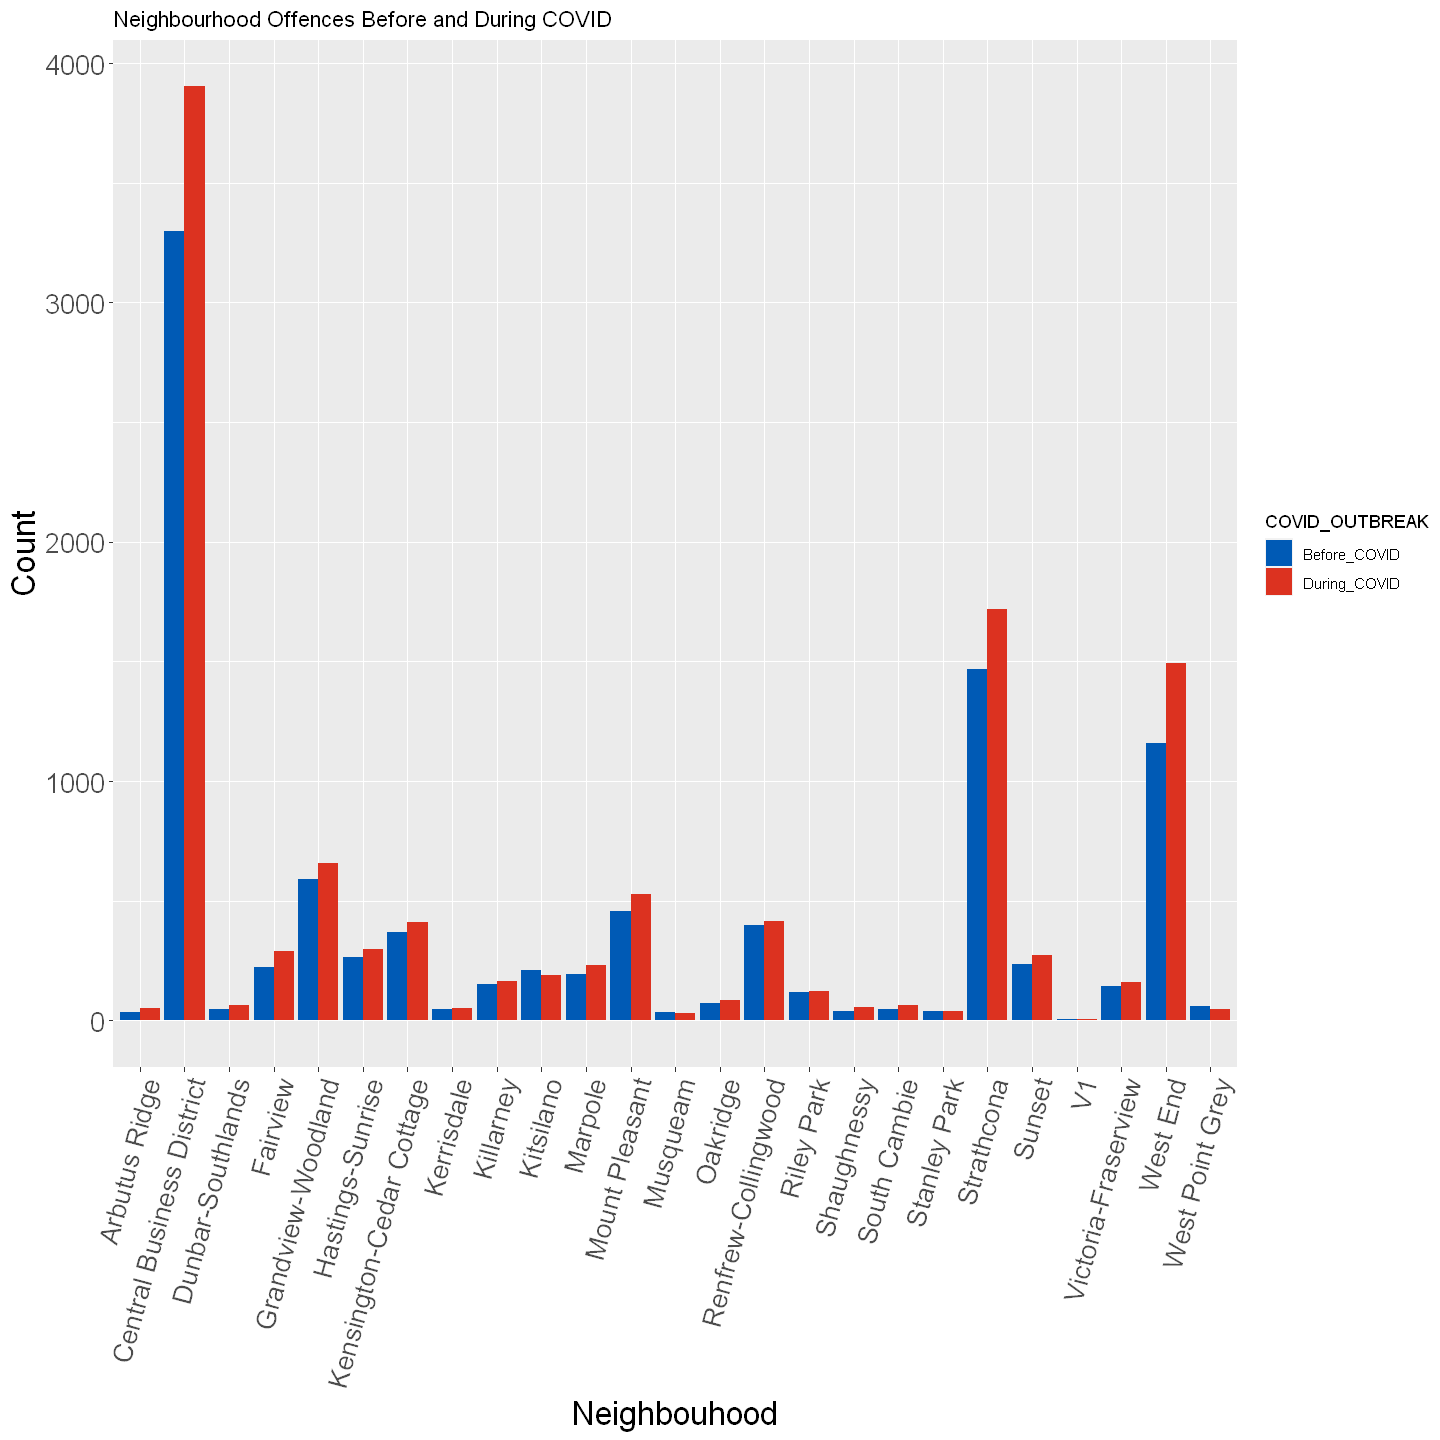

In [242]:
options(repr.plot.width = 12, repr.plot.height = 12)

# Set Seed for Reproducible Analysis
set.seed(123)

# Transforming criming into DF
frame_crime <- as.data.frame(criming)

# Transforming frame_crime DF
frame_crime_long <- pivot_longer(frame_crime, 
                                 -COVID_OUTBREAK,
                                 names_to = "Neighbourhood",
                                 values_to = "Value")

# Plotting Neighbourhood Crime Before vs. During COVID
diff_crime_plot <- frame_crime_long %>%
    ggplot(aes(x = Neighbourhood, y = Value, fill = COVID_OUTBREAK)) +
    geom_bar(stat = "identity", position = "dodge") +
    scale_fill_manual(values = c("#005AB5", "#DC3220")) + # Using Colourblind Friendly Colours
    labs(x = "Neighbouhood", y = "Count", fill = "COVID_OUTBREAK") +
    ggtitle("Neighbourhood Offences Before and During COVID") +
    theme(axis.text.x = element_text(angle = 75, vjust = 1, hjust = 1),
          axis.text = element_text(size = 16),
          axis.title = element_text(size = 20))

diff_crime_plot

**Figure 2:** Bar Chart for occurence of Offences Before and During COVID.

As we can see from the bar chart above, the ratio of offences have generally increased, while some of them have increased/decreased only slightly. By observing, we find `'Central Business District'` and `'Strathcona'` and `'West End'` to have a significant increase  compared to other `NEIGHBORUHOOD`'s.

Now we would like to analyze the overall change in `Offence Against a Person` from 2017 to 2022.

### 5. Analyzing Crime 'TYPE' `Offence Against a Person`

In [243]:
# Filtering Crime 'TYPE' to be `Offence Against a Person`
crime_for_offence <- crime %>%
    filter(TYPE == "Offence Against a Person") %>%
    select('YEAR','MONTH', 'DAY', 'NEIGHBOURHOOD')

head(crime_for_offence)

,YEAR,MONTH,DAY,NEIGHBOURHOOD
,<chr>,<chr>,<chr>,<chr>
1,2017,7,1,West End
2,2017,2,14,West End
3,2017,5,28,West End
4,2017,9,22,West End
5,2017,7,1,West End
6,2017,10,31,West End


**Table 6:** Preview of data on Crime TYPE: `'Offence Against a Person'`

Now we convert `YEAR` and `MONTH` columns to a date format and seperate the time as before and after the outbreak of COVID-19.

*(Y/M/D)*

**Before COVID:** *2017-01-01* to *2019-12-31*

**After COVID:**  *2020-01-01* to *2022-12-31*

In [244]:
# Transform the time into the Date format
crime_for_offence$DATE <- as.Date(paste(crime_for_offence$YEAR, 
                                        crime_for_offence$MONTH,
                                        "01",
                                        sep = "-"), 
                                  format = "%Y-%m-%d")

# Double check by filtering the date into the range we would target generally.
subset_data <- subset(crime_for_offence, crime_for_offence$DATE >= as.Date("2017-01-01") &
                                         crime_for_offence$DATE <= as.Date("2022-12-31"))

# Seperate the dataset into two parts according to the outbreak of COVID-19.
subset_data$OUTBREAK <- ifelse(subset_data$DATE < as.Date("2020-01-01"), 
                               "Before", "After")

head(subset_data)
tail(subset_data)

,YEAR,MONTH,DAY,NEIGHBOURHOOD,DATE,OUTBREAK
,<chr>,<chr>,<chr>,<chr>,<date>,<chr>
1,2017,7,1,West End,2017-07-01,Before
2,2017,2,14,West End,2017-02-01,Before
3,2017,5,28,West End,2017-05-01,Before
4,2017,9,22,West End,2017-09-01,Before
5,2017,7,1,West End,2017-07-01,Before
6,2017,10,31,West End,2017-10-01,Before


,YEAR,MONTH,DAY,NEIGHBOURHOOD,DATE,OUTBREAK
,<chr>,<chr>,<chr>,<chr>,<date>,<chr>
21082,2022,8,23,Strathcona,2022-08-01,After
21083,2022,9,3,Strathcona,2022-09-01,After
21084,2022,9,19,Strathcona,2022-09-01,After
21085,2022,10,4,Strathcona,2022-10-01,After
21086,2022,10,20,Strathcona,2022-10-01,After
21087,2022,11,4,Strathcona,2022-11-01,After


**Table 7:** Preview of `'Offence Against a Person'` before COVID *(2017-07-01 to 2020-01-01)* and after *(2020-01-01 to 2022-11-01)*

Now we are going to create a frequency plot of crimes by month and year and stratified by the period before and after the outbreak of COVID-19, and convert it to a data frame and edit it slightly.

`summarise()` has grouped output by 'DATE'. You can override using the
`.groups` argument.


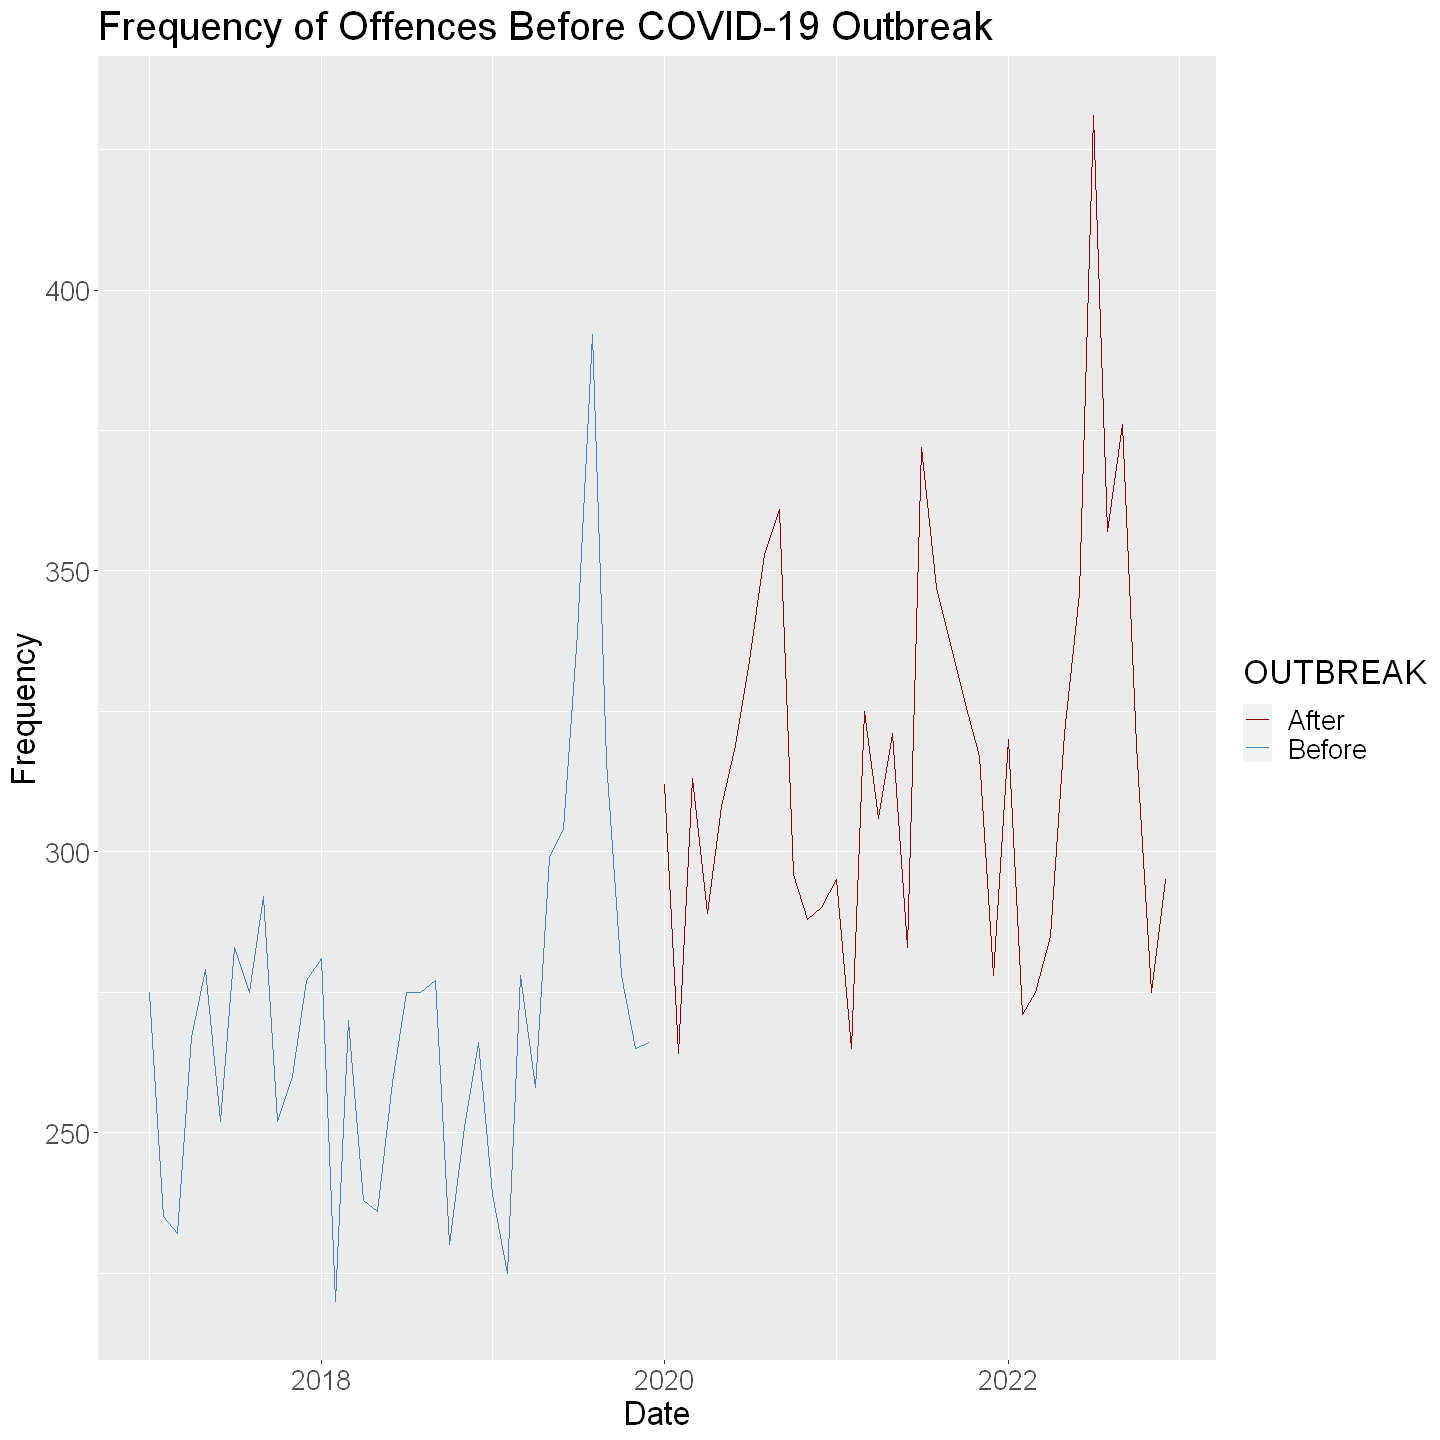

In [245]:
options(repr.plot.width = 12, repr.plot.height = 12)

# Grouping data by Data and OUTBREAK
grouped_data <- subset_data %>%
    group_by(DATE, OUTBREAK) %>%
    summarize(count = n())

# Plotting Line Plot
frequency_plot <- grouped_data %>%
    ggplot(aes(x = DATE, y = count)) +
               geom_line(aes(color = OUTBREAK)) +
               scale_color_manual(values = c("darkred", "steelblue")) + 
               ggtitle("Frequency of Offences Before COVID-19 Outbreak") +
               labs(x = "Date", y = "Frequency") +
               theme(text = element_text(size = 20))
frequency_plot

**Figure 3:** Line Plot of Crime Frequency Before and After COVID. 

(We can observe how it is an overall increase)

# Methods

## Plans

Uptill now, we have seen significant fluctuations for the crime rate for `Offence Against a Person` before and after COVID. Since our dataset has 21087 samples, we feel it is representative of the general population.

To support out plots, we will use a combination of exploratory data analysis. We will employ resampling and asymptotic approaches to support our plots. Since we know our dataset is generalizable to Vancouver, we can assume they are less error-prone and resemble more to a sampling distribtuion.

We still use boostrapping individually on before and after COVID to see whether there is substantial overlap for confidence intervals to further reinforce our assumption of crime rate fluctuations.



We will also apply t-distributions due to their broader spread and fatter tails to take the possibilty of replacement error into consideration. We will also use this to figure out the p-value, which will help us determine whether we should reject the null hypothesis.

The following is our hypothesis test:

- Null hypothesis: The ratio of the crime **has no fluctuation** when it was the outbreak of COVID-19.
- Alternative hypothesis: The ratio of the crime **has fluctuation** when it was the outbreak of COVID-19.

We will use a 95% confidence level, and a significance level of 5%.

## Performing Data Analysis

### 6. Analysis of `Offence Against a Person` (Using the whole of Vancouver) 
Now we want to perform bootstrapping to analyze our data before and after COVID. We will be resampling the data and computing confidence intervals for the means.

In [246]:
# Load Library
library(boot)

In [247]:
# Convert the date to a numeric format such as the number of days since a reference date.
before_data$days_since_outbreak <- as.integer(as.Date("2020-01-01") - before_data$DATE)
after_data$days_since_outbreak <- as.integer(after_data$DATE - as.Date("2020-01-01"))

# Extract the filtered date above
before_days <- before_data$days_since_outbreak
after_days <- after_data$days_since_outbreak

# Get the samples' size
num_int_b <- length(before_data$days_since_outbreak)
num_int_b
num_int_a <- length(after_data$days_since_outbreak)
num_int_a

# Define a function to compute the mean of a sample
mean_func <- function(data, index) {
    mean(data[index])
}

# Perform bootstrap resampling
before_boot <- boot(before_data$days_since_outbreak, mean_func, R = 1000)
after_boot <- boot(after_data$days_since_outbreak, mean_func, R = 1000)

# Compute the confidence intervals for the means
before_ci <- boot.ci(before_boot, type = "perc")
after_ci <- boot.ci(after_boot, type = "perc")

# Print the confidence intervals
print(before_ci)
print(after_ci)

[1] 9716

[1] 11371

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = before_boot, type = "perc")

Intervals : 
Level     Percentile     
95%   (543.8, 556.0 )  
Calculations and Intervals on Original Scale
BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = after_boot, type = "perc")

Intervals : 
Level     Percentile     
95%   (533.2, 545.3 )  
Calculations and Intervals on Original Scale


**Table 8:** Bootstrap Distribution with Confidence Intervals for Offense Crime Before and After COVID

Now let's generate plots with the bootstrap distribution as well as the confidence intervals overlaid on top of the distribution respectively.

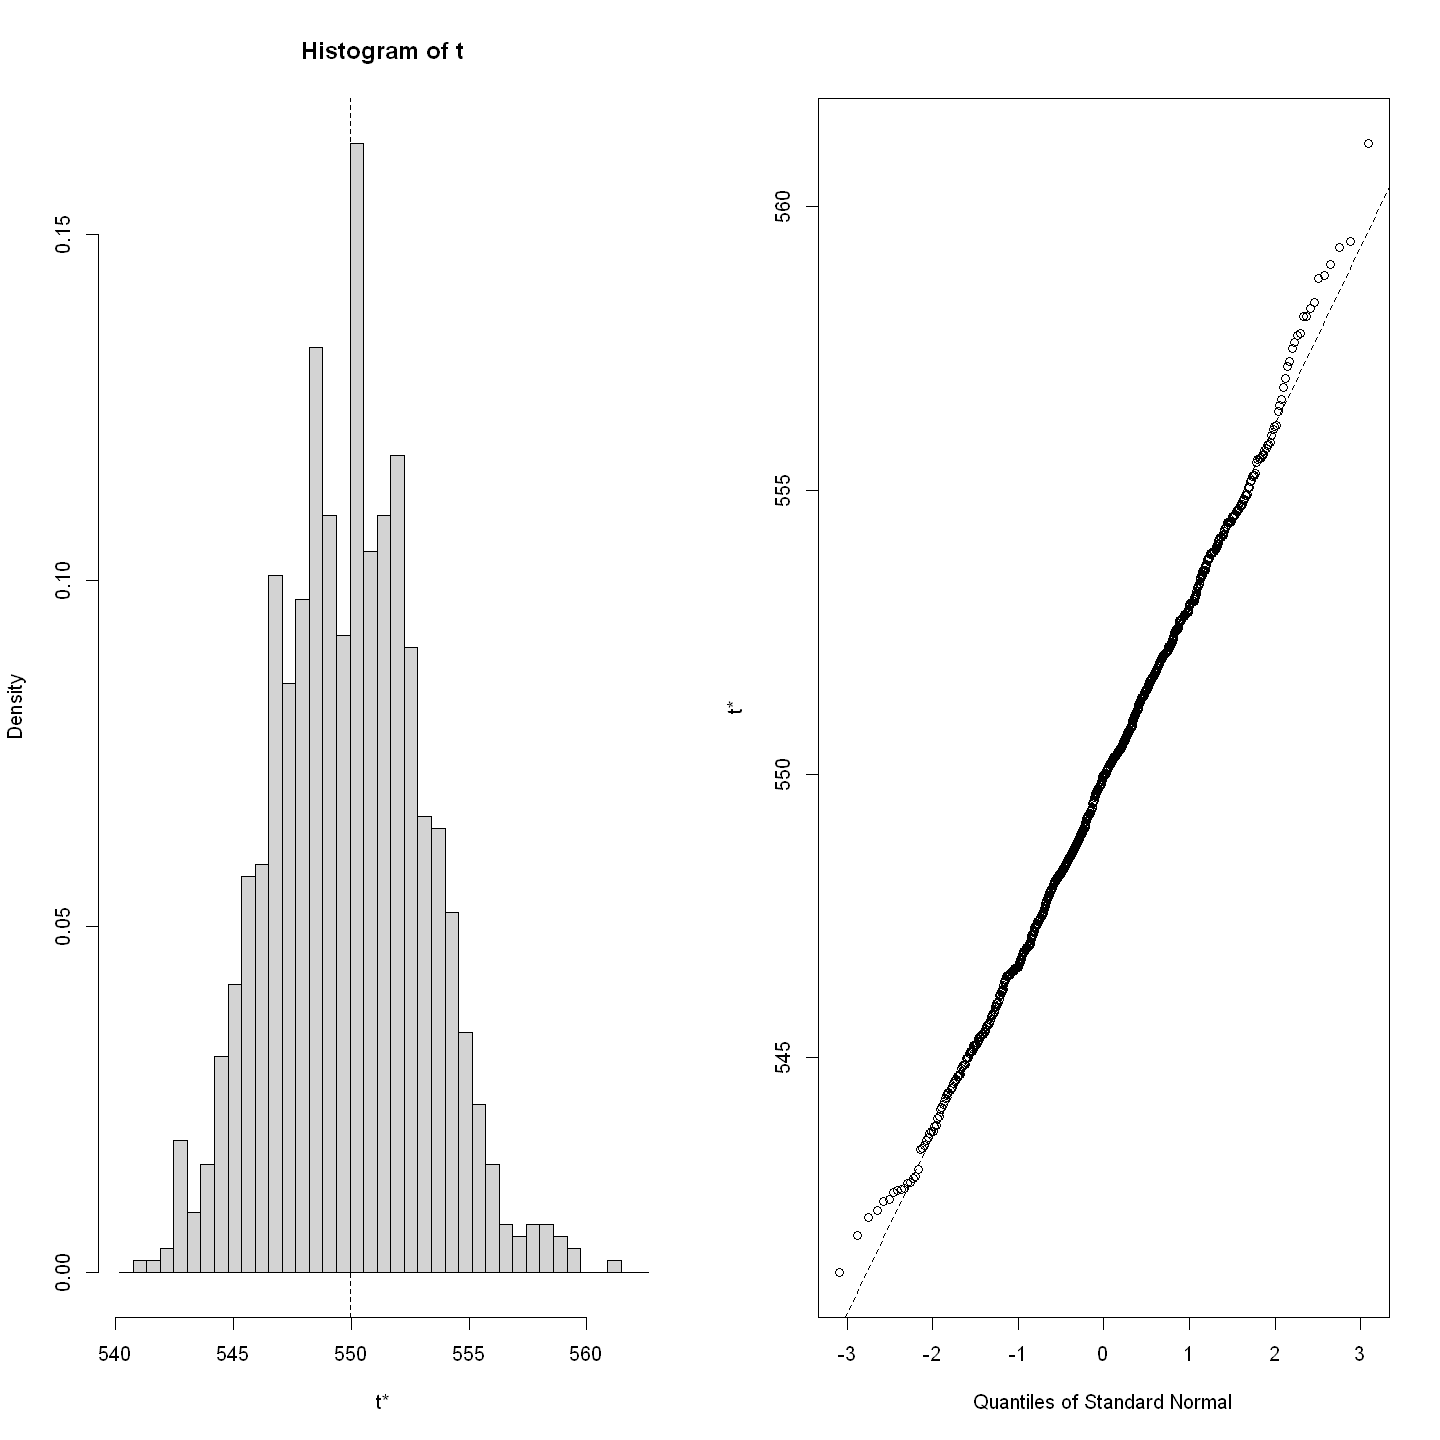

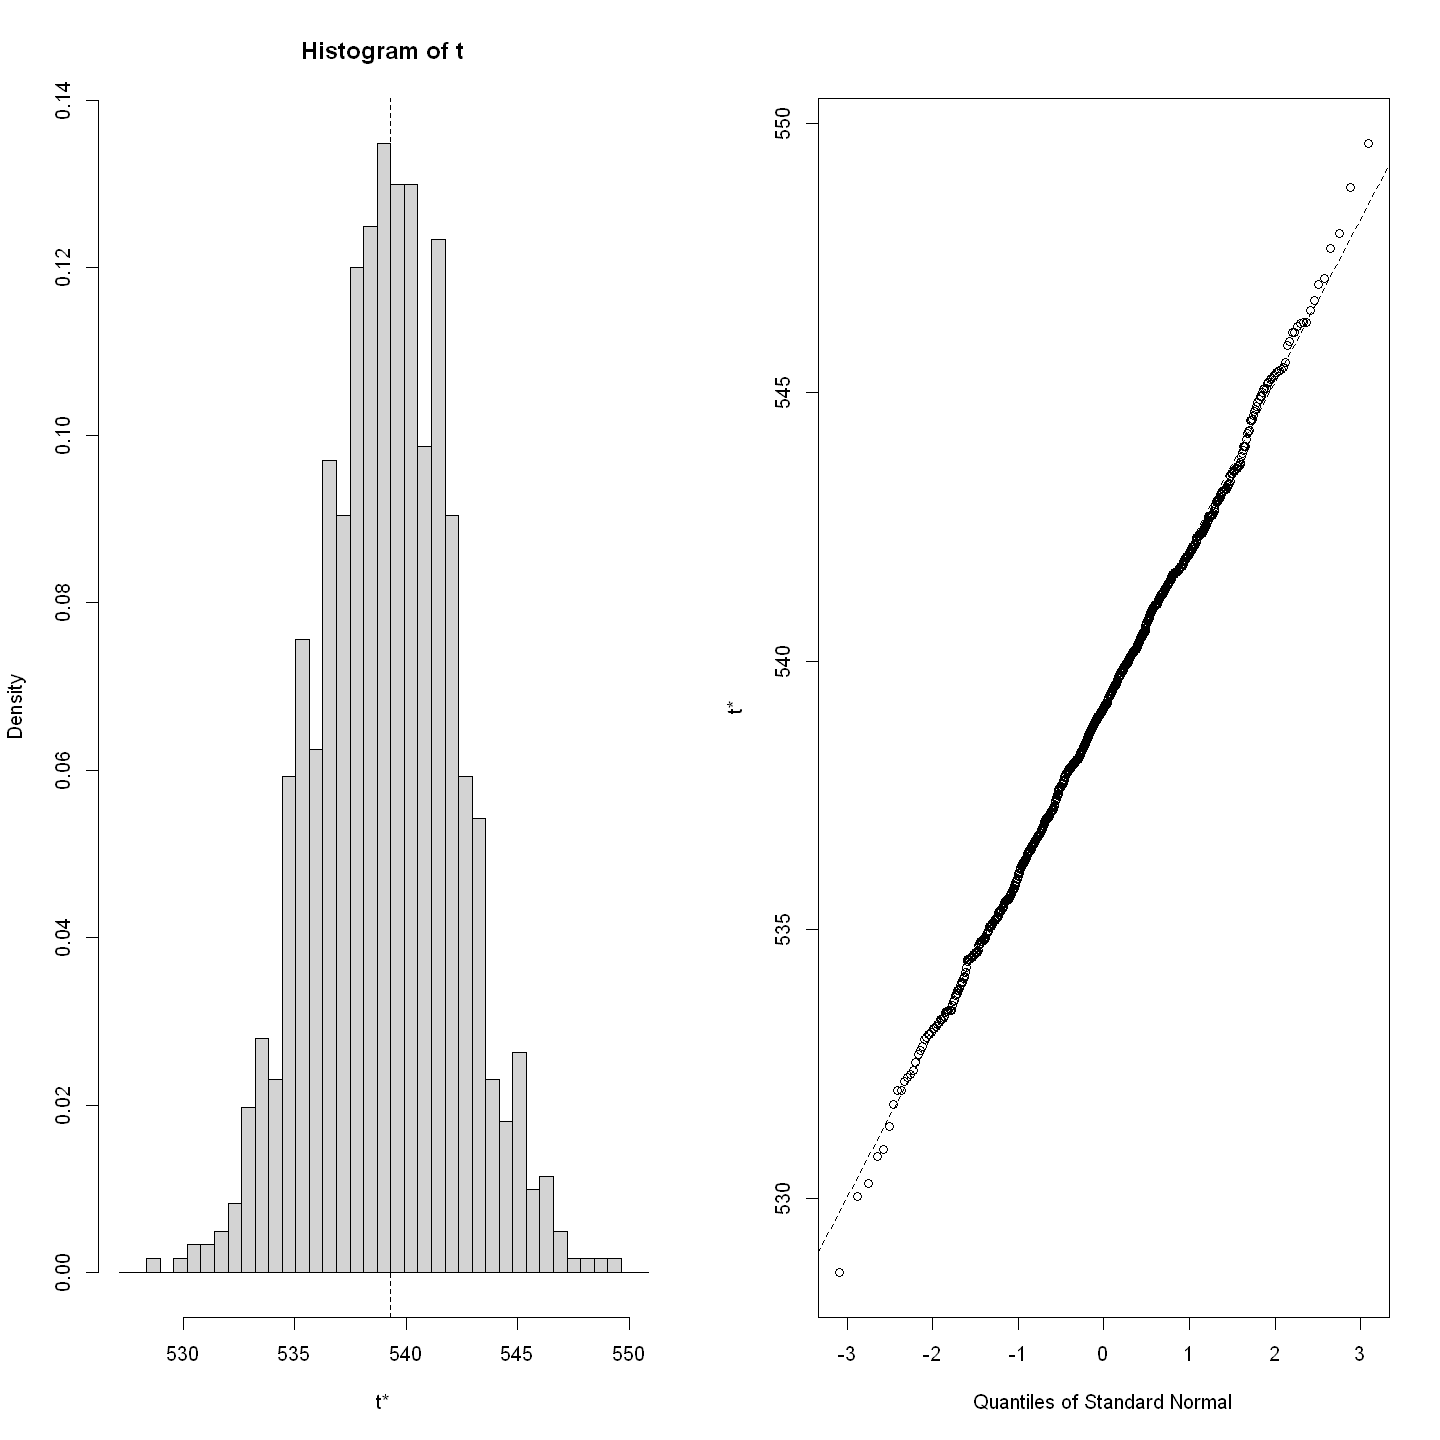

In [248]:
plot(before_boot, type = "bci")
plot(after_boot, type = "bci")

**Figure 4:** Plots with bootstrap distribution of the two timeslots' data respectively.

Now that we have calculated the bootstrap distribution, let's visualize the bootstrapping distribution of means.

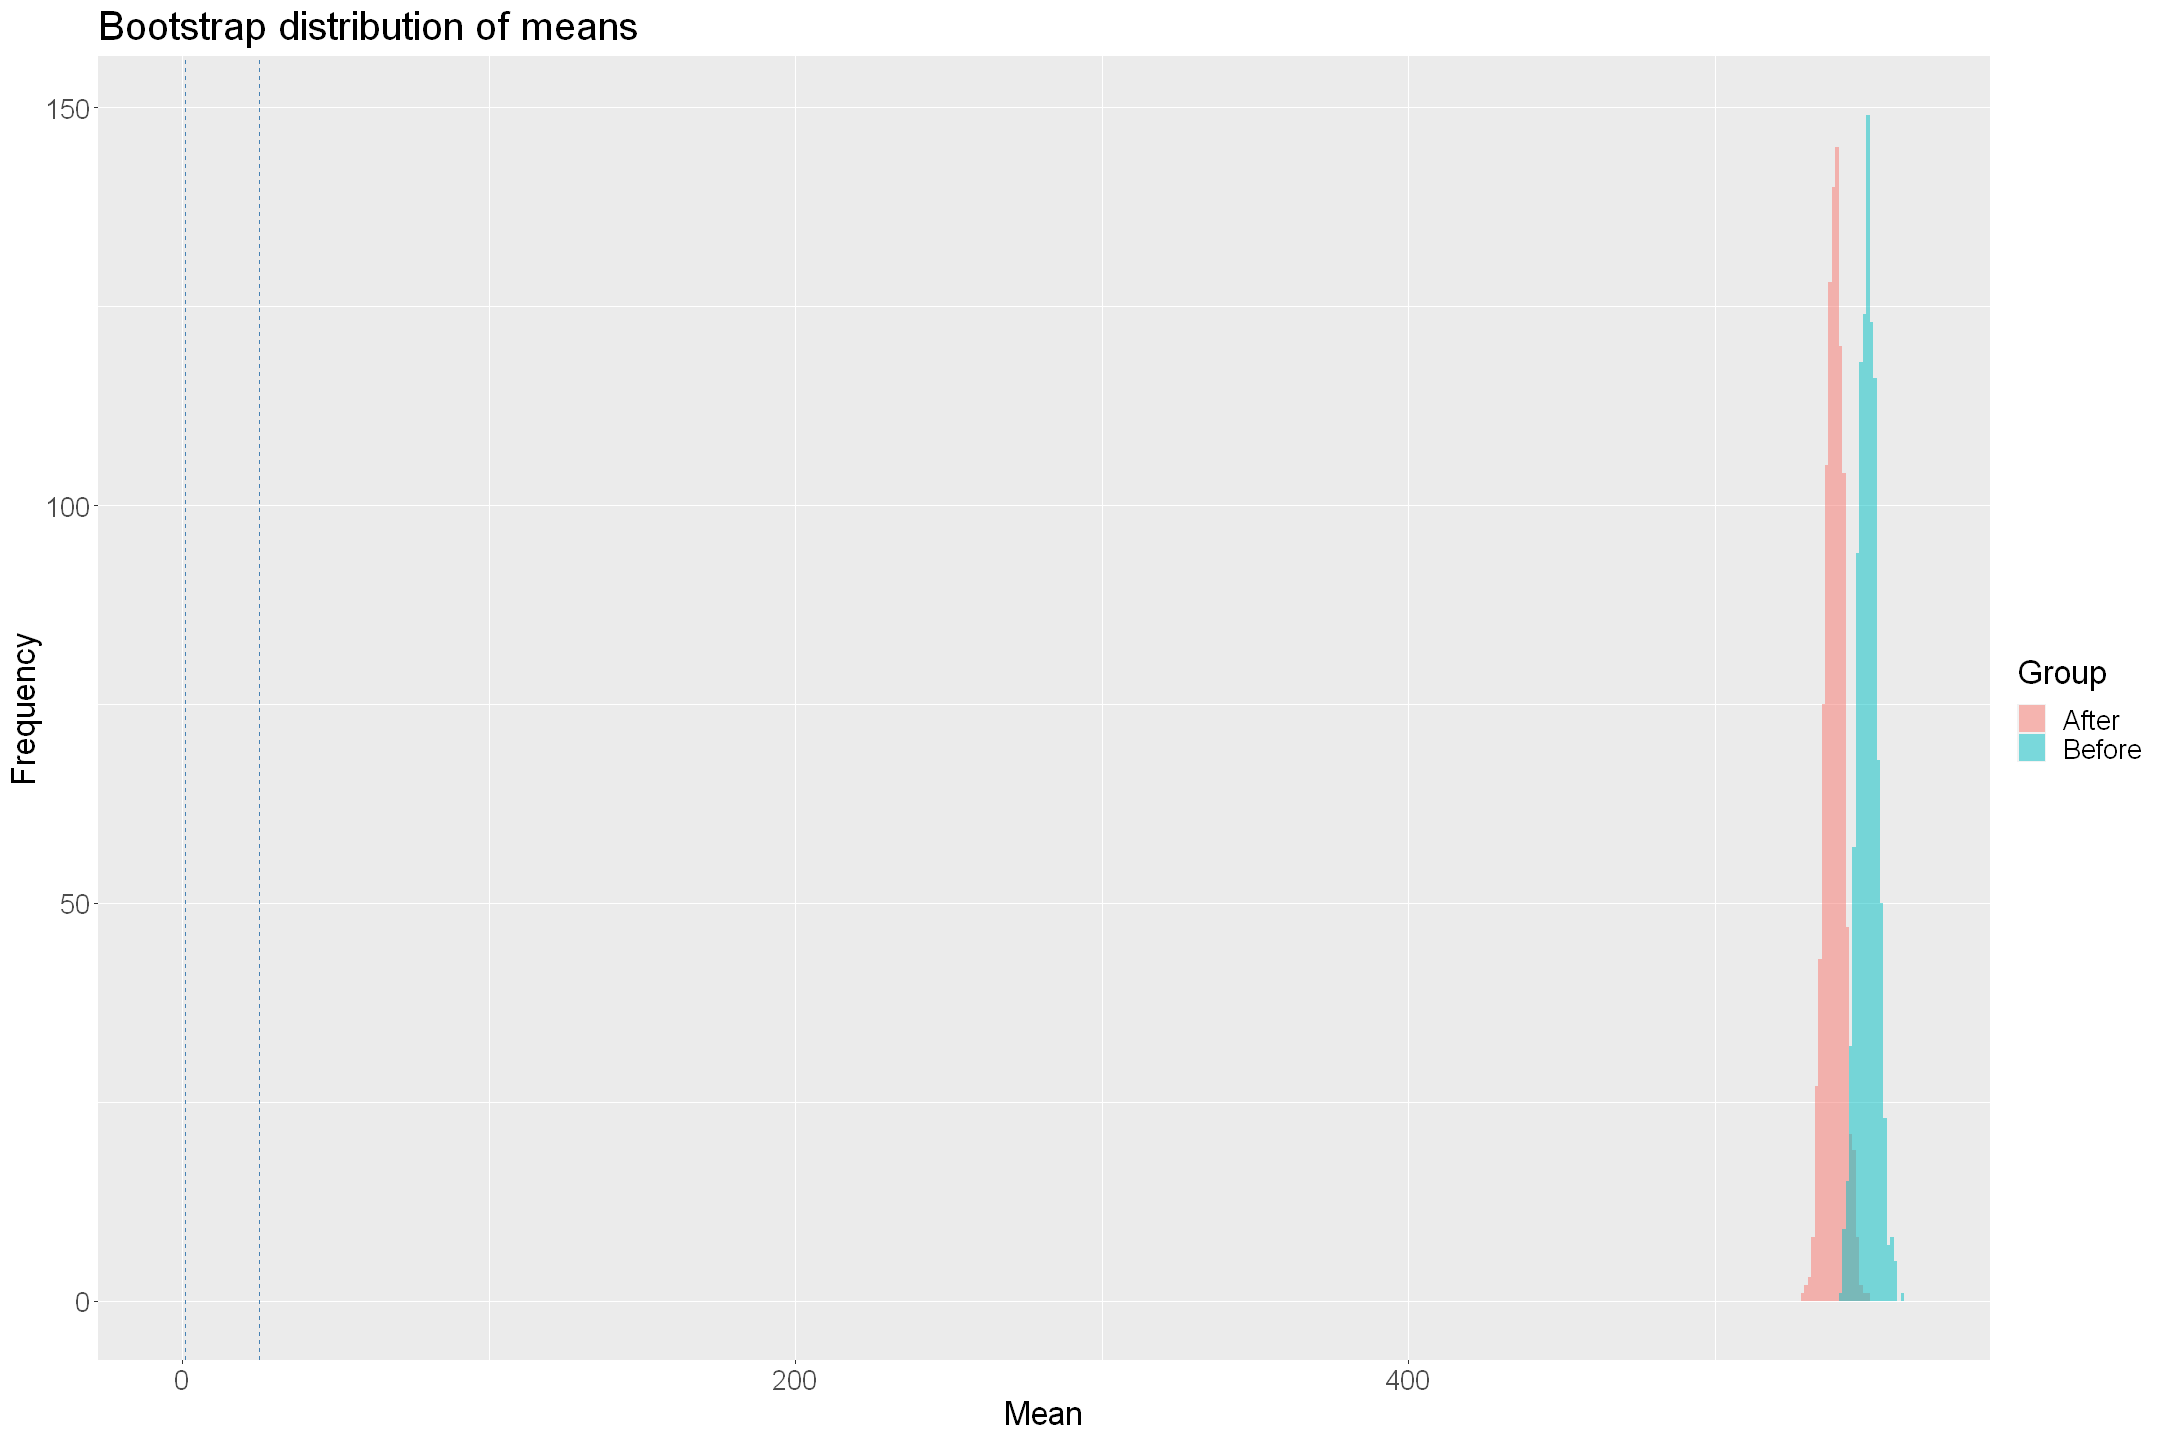

In [249]:
options(repr.plot.width = 18, repr.plot.height = 12)

# Create a data frame with the bootstrap means and labels
before_df <- data.frame(value = before_boot$t, group = "Before")
after_df <- data.frame(value = after_boot$t, group = "After")
df <- rbind(before_df, after_df)

# Create a histogram with confidence intervals
ggplot(df, aes(x = value, fill = group)) +
    geom_histogram(alpha = 0.5, position = "identity", bins = 500) +
    geom_vline(xintercept = before_ci$percent[1], linetype = "dashed", color = "darkred") +
    geom_vline(xintercept = before_ci$percent[2], linetype = "dashed", color = "darkred") +
    geom_vline(xintercept = after_ci$percent[1], linetype = "dashed", color = "steelblue") +
    geom_vline(xintercept = after_ci$percent[2], linetype = "dashed", color = "steelblue") +
    labs(title = "Bootstrap distribution of means",
         x = "Mean",
         y = "Frequency",
         fill = "Group") +
    theme(text = element_text(size = 20))

**Figure 4:** Bootstrap Distribution of Means

According to the graph above, the confidence intervals overlap substantially, it suggests that there may not be a statistically significant difference between the groups being compared. However, it is not a definitive indication of the presence or absence of a statistically significant difference.

Let's perform hypothesis testing to determine whether there is a significant difference between the distributions of crimes before and after the outbreak. 

We will use **t-test**, and then **check the p-value**.

In [250]:
# Doing t-test which includes p-value.
t.test(before_days, after_days)


	Welch Two Sample t-test

data:  before_days and after_days
t = 2.4186, df = 20495, p-value = 0.01559
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  2.014768 19.239448
sample estimates:
mean of x mean of y 
 549.9443  539.3172 


**Table 9:** two-sample t-test on Before vs. After COVID Offences

From the result above, we can observed that the two-samples' p-value from t-test is **less than 0.05**, which is 0.01559.
We can **reject the null hypothesis**.
And now we can tell that **there is significant difference in the mean frequency of crime** before and after the outbreak of COVID-19.

### 7. Analysis of `Offence Against a Person` (Analyzing the `Neighbourhoods` within Vancouver) 

Now we will try to do the **Hypothesis Test** for each `NEIGHBOURHOOD` :

We are going to compare the frequency of crime from 2017 to 2019 and 2020 to 2022 for each `NEIGHBOURHOOD` and obtain the p-value for each test.

In [251]:
# Filter and Select data from crime
crime_offence <- crime %>%
    filter(TYPE == "Offence Against a Person") %>%
    filter(NEIGHBOURHOOD != "") %>%
    select(YEAR, NEIGHBOURHOOD)

# Create a new column to indicate whether the crime happened from 2017 to 2019 or 2020 to 2022
crime_offence$period <- ifelse(crime_offence$YEAR %in% c(2017, 2018, 2019), "2017-2019", "2020-2022")

# Get a list of unique neighborhoods
neighborhoods <- unique(crime_offence$NEIGHBOURHOOD)

# Create an empty vector to store the p-values
p_values <- c()

for (n in neighborhoods) {
  # Subset the data for the current neighborhood
  neighborhood_data <- subset(crime_offence, NEIGHBOURHOOD == n)
  
  # Create a contingency table of crime frequency by year and period
  contingency_table <- table(neighborhood_data$YEAR, neighborhood_data$period)
  
  # Conduct a chi-square test of independence to compare the frequency of crime between the two periods
  chi_sq_test <- chisq.test(contingency_table)
  
  # Extract the p-value from the test result
  p_value <- chi_sq_test$p.value
  
  # Add the p-value to the vector
  p_values <- c(p_values, p_value)
}

# Print the p-values for each neighborhood
names(p_values) <- neighborhoods

# Convert the p-values to a data frame
p_values_df <- data.frame(NEIGHBOURHOOD = names(p_values), p_value = p_values)

# Create a tidy format using the gather function
tidy_p_values <- gather(p_values_df, key = "test", value = "p_value", -NEIGHBOURHOOD)

tidy_p_values

Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"


NEIGHBOURHOOD,test,p_value
<chr>,<chr>,<dbl>
West End,p_value,0.000000e+00
Stanley Park,p_value,1.358353e-15
Central Business District,p_value,0.000000e+00
Mount Pleasant,p_value,6.453203e-211
Strathcona,p_value,0.000000e+00
Grandview-Woodland,p_value,2.633585e-268
Kensington-Cedar Cottage,p_value,9.060487e-167
Hastings-Sunrise,p_value,5.382466e-119
Renfrew-Collingwood,p_value,1.781760e-173


**Table 10:** p-values of each Neighbourhood

As we can see from the chart above, according to the p_values for the `NEIGHBOURHOOD` column, they are generally super small.

It is in turn showing a strong evidence to support the assumption that the frequency of **`Offence Against a Person`** had a big fluctuation during the outbreak of COVID-19. Again we can **reject the null hypothesis**.

## Discussion:

### Recap
In this report, we tested the question of whether the crime rate was influenced by the outbreak of COVID-19 and which types of crime have abnormal fluctuations that need people to pay attention to. We found confidence intervals using bootstrapping, resampling the data, and conducting hypothesis testing which revealed that there is significant difference in the mean frequency of crime before and after the outbreak of COVID-19. Then we did the hypothesis test on comparing the frequency and obtaining the p-value for each test. These p-values support the assumption that the frequency of Offence Against a Person had a big fluctuation during the outbreak of COVID-19.

### Expectations

We expected to find significant changes in the frequency of crime following the outbreak of COVID-19. This is because the pandemic had led to unprecedented disruptions in daily life, including economic stress, social isolation, and increased substance abuse, which are all factors that could potentially drive changes in crime rates. Specifically, we expected to see an increase in crimes related to offences. 

### Interpretation
After conducting our tests, our predictions were able to come true, we were able to **reject the null hypothesis** with there being significant fluctuations in `Offence Against a Person` with an average increase.

### Limitations

This project's primary source of error was our decision on choosing the significance level. We chose 5% to be our level and it also determined the likelihood of making a Type I error. The 5% indicates the likelihood of our **null hypothesis** being true. 

This analysis is also limited by the scope of the data and the communities included hence may not be generalizable to other communities or regions. We also only analyzed if there were significant changes in crime rate, not the causes which may be many.

## Conclusion

### Impact
Our analysis suggests that the outbreak of COVID-19 has had a significant impact on the frequency of crime in the community. Specifically, we found the following:

1. The outbreak of COVID-19 has had a significant impact on the frequency of crime in the community, particularly Offence Against a Person.
2. Economic stress, social isolation, and increased substance abuse are likely drivers of the increase in crime.
3. Racial discrimination could potentailly also be a significant aspect of this crime that needs to be addressed.

Overall, our analysis underscores the urgent need for policymakers and law enforcement agencies to address the root causes of this increase in crime and develop strategies to mitigate the impact of the outbreak on community safety. Our study highlights the need for targeted crime prevention strategies to address the significant increase in certain types of crimes during the COVID-19 pandemic. Policymakers can use these findings to allocate resources effectively and develop evidence-based strategies to respond to and prevent crime during future pandemics or crisis situations.

### Future Questions
This study provides a foundation for future research in this area. For instance:

- Further investigation could explore the causal mechanisms behind the observed increase in crime during the pandemic. 
- Research could examine how different communities were impacted by the pandemic, and whether certain factors (such as demographic characteristics, economic conditions, or public health policies) played a role in shaping crime patterns.
- We could analyze crime in specific neighbourhoods more rigourously which in turn would provide the necessary police force information to allocate resources effectively.

## References:

- SFU Research. (n.d.). How COVID-19 Lockdowns Affected Crime in Vancouver. Retrieved from https://www.sfu.ca/research/scholarly-impacts/how-covid-19-lockdowns-affected-crime-vancouver

- Vancouver Police Department. (n.d.). Home. Retrieved from https://vpd.ca/

- CBC News.(2021, June 28). How COVID-19 lockdowns have changed the way Vancouver police respond to crime. CBC News. https://www.cbc.ca/amp/1.6078015